# Push files to the Hub
- Ref: https://huggingface.co/docs/diffusers/v0.34.0/en/using-diffusers/push_to_hub

In [1]:
#@title
import torch
cpu_use = False
if torch.backends.mps.is_available():
    t_device = torch.device("mps")
    s_device = "mps"
    print(f"Current memory allocated on MPS: {torch.mps.current_allocated_memory()} bytes")
    print(f"Driver memory allocated on MPS: {torch.mps.driver_allocated_memory()} bytes")
elif torch.cuda.is_available():
    t_device = torch.device("cuda")
    s_device = "cuda"
else:
    t_device = torch.device("cpu")
    s_device = "cpu"
    cpu_use = True
print(t_device)

Current memory allocated on MPS: 0 bytes
Driver memory allocated on MPS: 393216 bytes
mps


In [3]:
from huggingface_hub import notebook_login

notebook_login()

## 1. Models


In [4]:
from diffusers import ControlNetModel

controlnet = ControlNetModel(
    block_out_channels=(32, 64),
    layers_per_block=2,
    in_channels=4,
    down_block_types=("DownBlock2D", "CrossAttnDownBlock2D"),
    cross_attention_dim=32,
    conditioning_embedding_out_channels=(16, 32),
)
controlnet.push_to_hub("my-controlnet-model")

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.76M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/hyunjae-kang318/my-controlnet-model/commit/0a75b0400c06c2682292023f463da604cac0de02', commit_message='Upload model', commit_description='', oid='0a75b0400c06c2682292023f463da604cac0de02', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hyunjae-kang318/my-controlnet-model', endpoint='https://huggingface.co', repo_type='model', repo_id='hyunjae-kang318/my-controlnet-model'), pr_revision=None, pr_num=None)

In [5]:
controlnet.push_to_hub("my-controlnet-model", variant="fp16")

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/hyunjae-kang318/my-controlnet-model/commit/200d9fc328f0f1b5096a92e89b8541808b1481a0', commit_message='Upload model', commit_description='', oid='200d9fc328f0f1b5096a92e89b8541808b1481a0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hyunjae-kang318/my-controlnet-model', endpoint='https://huggingface.co', repo_type='model', repo_id='hyunjae-kang318/my-controlnet-model'), pr_revision=None, pr_num=None)

In [13]:
model = ControlNetModel.from_pretrained("hyunjae-kang318/my-controlnet-model")


## 2. Scheduler

In [17]:
from diffusers import DDIMScheduler

scheduler = DDIMScheduler(
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
)
scheduler.push_to_hub("my-controlnet-scheduler")

README.md: 0.00B [00:00, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/hyunjae-kang318/my-controlnet-scheduler/commit/3801d50498f6fa831acc2555bc0be7b4d15648b3', commit_message='Upload scheduler', commit_description='', oid='3801d50498f6fa831acc2555bc0be7b4d15648b3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hyunjae-kang318/my-controlnet-scheduler', endpoint='https://huggingface.co', repo_type='model', repo_id='hyunjae-kang318/my-controlnet-scheduler'), pr_revision=None, pr_num=None)

In [18]:
scheduler = DDIMScheduler.from_pretrained("hyunjae-kang318/my-controlnet-scheduler")

scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

## 3. Pipeline

In [19]:
from diffusers import (
    UNet2DConditionModel,
    AutoencoderKL,
    DDIMScheduler,
    StableDiffusionPipeline,
)
from transformers import CLIPTextModel, CLIPTextConfig, CLIPTokenizer

unet = UNet2DConditionModel(
    block_out_channels=(32, 64),
    layers_per_block=2,
    sample_size=32,
    in_channels=4,
    out_channels=4,
    down_block_types=("DownBlock2D", "CrossAttnDownBlock2D"),
    up_block_types=("CrossAttnUpBlock2D", "UpBlock2D"),
    cross_attention_dim=32,
)

scheduler = DDIMScheduler(
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
)

vae = AutoencoderKL(
    block_out_channels=[32, 64],
    in_channels=3,
    out_channels=3,
    down_block_types=["DownEncoderBlock2D", "DownEncoderBlock2D"],
    up_block_types=["UpDecoderBlock2D", "UpDecoderBlock2D"],
    latent_channels=4,
)

text_encoder_config = CLIPTextConfig(
    bos_token_id=0,
    eos_token_id=2,
    hidden_size=32,
    intermediate_size=37,
    layer_norm_eps=1e-05,
    num_attention_heads=4,
    num_hidden_layers=5,
    pad_token_id=1,
    vocab_size=1000,
)
text_encoder = CLIPTextModel(text_encoder_config)
tokenizer = CLIPTokenizer.from_pretrained("hf-internal-testing/tiny-random-clip")

tokenizer_config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [20]:
components = {
    "unet": unet,
    "scheduler": scheduler,
    "vae": vae,
    "text_encoder": text_encoder,
    "tokenizer": tokenizer,
    "safety_checker": None,
    "feature_extractor": None,
}

pipeline = StableDiffusionPipeline(**components)
pipeline.push_to_hub("my-pipeline")

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:223: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you

model.safetensors:   0%|          | 0.00/283k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.74M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/hyunjae-kang318/my-pipeline/commit/a6910bf22212d2ec90391509361b9e40923204a6', commit_message='Upload StableDiffusionPipeline', commit_description='', oid='a6910bf22212d2ec90391509361b9e40923204a6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hyunjae-kang318/my-pipeline', endpoint='https://huggingface.co', repo_type='model', repo_id='hyunjae-kang318/my-pipeline'), pr_revision=None, pr_num=None)

  0%|          | 0/50 [00:00<?, ?it/s]

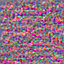

In [24]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipeline(prompt).images[0]
image

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

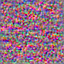

In [23]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("hyunjae-kang318/my-pipeline")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipe(prompt).images[0]
image